In [ ]:
from ydata_profiling import ProfileReport
import pandas as pd
df = pd.read_csv("teleco.csv")
profile = ProfileReport(df)
profile.to_file("TelecoProfileReport.html")


- `SeniorCitizen`: Si el cliente es ciudadano senior (0 = no, 1 = sí).
- `Partner`: Si el cliente tiene pareja (0 = no, 1 = sí).
- `Dependents`: Si el cliente tiene personas a su cargo (0 = no, 1 = sí).
- `tenure`: Meses de permanencia del cliente con la compañía.
- `PhoneService`: Si el cliente tiene servicio telefónico (0 = no, 1 = sí).
- `MultipleLines`: Si el cliente tiene múltiples líneas telefónicas (0 = no, 1 = sí, 2 = no aplica).
- `InternetService`: Tipo de servicio de internet (0 = ninguno, 1 = DSL, 2 = fibra óptica).
- `TechSupport`: Si el cliente tiene soporte técnico (0 = no, 1 = sí, 2 = no aplica).
- `StreamingTV`: Si el cliente tiene servicio de TV por streaming (0 = no, 1 = sí, 2 = no aplica).
- `StreamingMovies`: Si el cliente tiene servicio de películas por streaming (0 = no, 1 = sí, 2 = no aplica).
- `Contract`: Tipo de contrato del cliente (0 = mes a mes, 1 = un año, 2 = dos años).
- `PaymentMethod`: Método de pago (0 = transferencia bancaria, 1 = tarjeta crédito, 2 = domiciliación bancaria, 3 = cheque).
- `MonthlyCharges`: Cargos mensuales que paga el cliente.
- `TotalCharges`: Cargos totales que ha pagado el cliente durante su estancia.
- `Churn`: Si el cliente ha abandonado el servicio (0 = no, 1 = sí).


🔎 Valores faltantes por columna:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

📊 Estadísticas descriptivas (variables numéricas):
                 count         mean          std    min       25%       50%  \
tenure          7032.0    32.421786    24.545260   1.00    9.0000    29.000   
MonthlyCharges  7032.0    64.798208    30.085974  18.25   35.5875    70.350   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.4500  1397.475   

                      75%      max  
tenure            55.0000    72.00  
MonthlyCharges    89.8625   118.75  
TotalCharges    3794.7375  8684.80

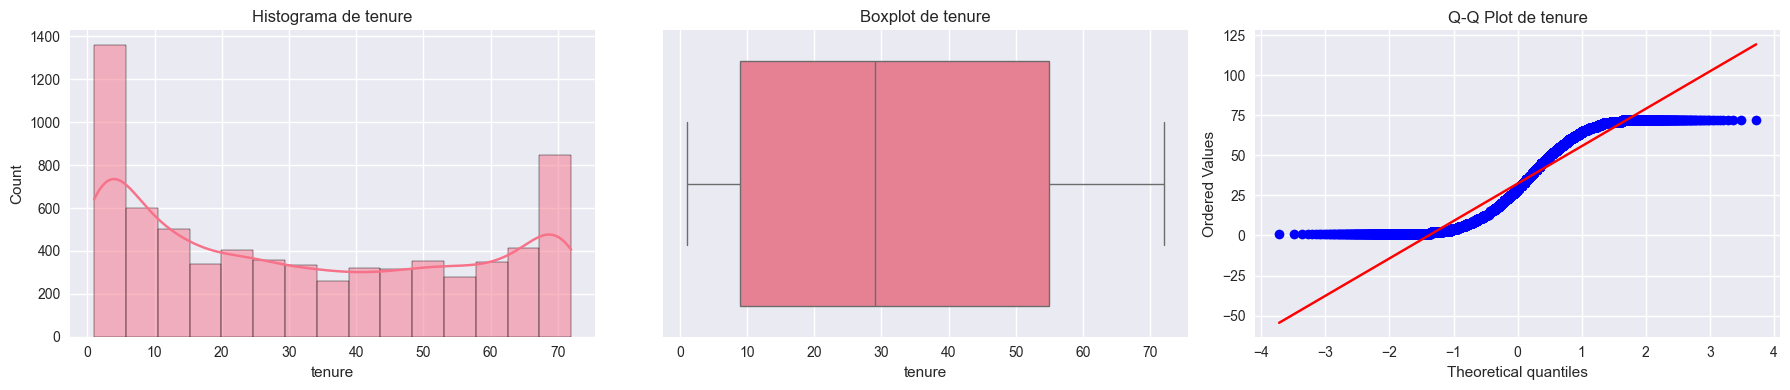

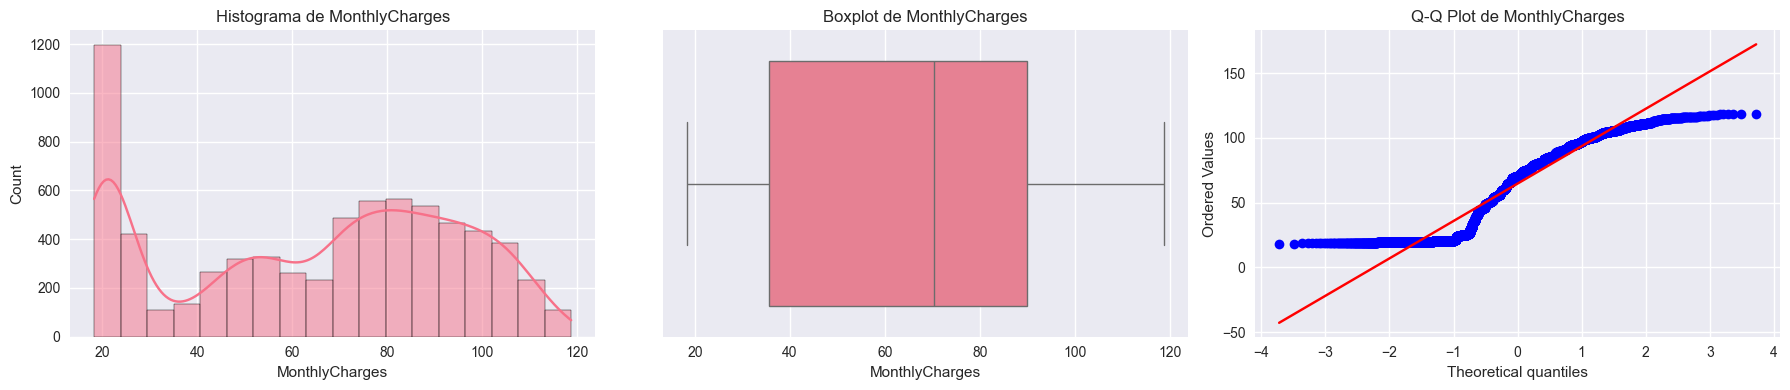

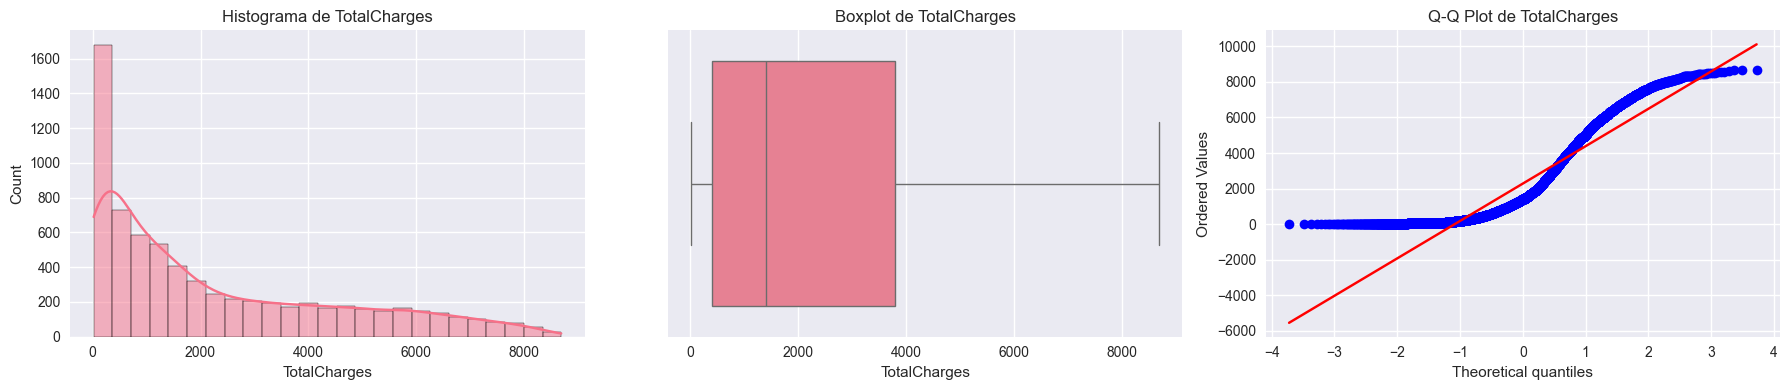


🔗 Correlaciones Pearson:


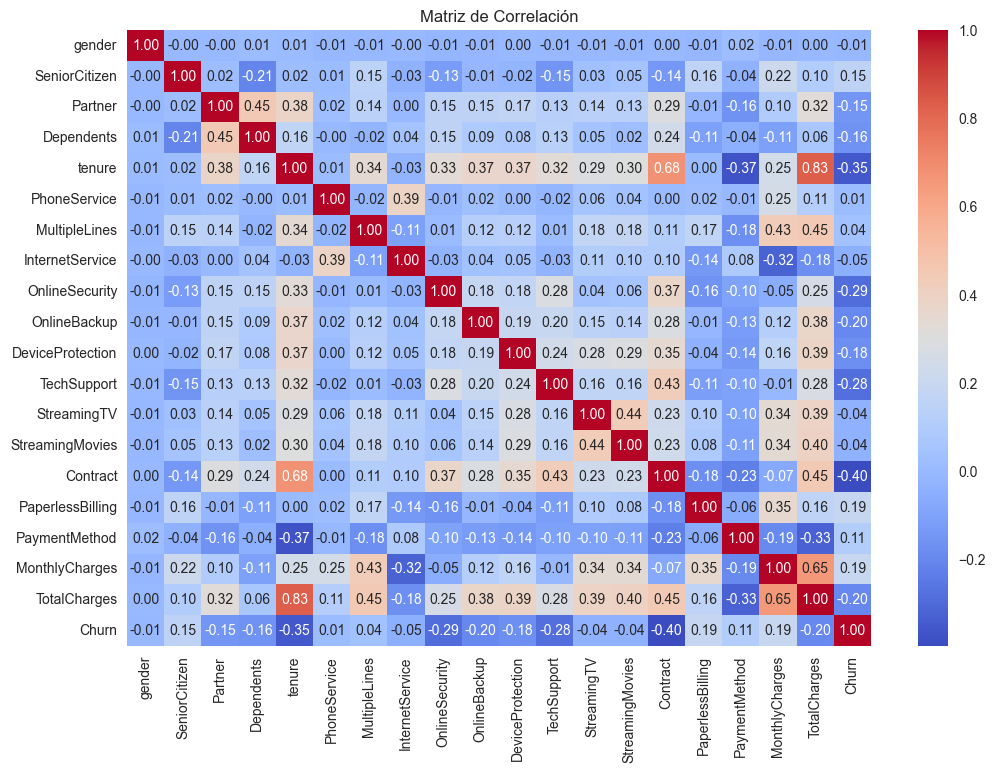

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

warnings.filterwarnings("ignore")

# Configuración visual
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
np.random.seed(42)

# Cargar el dataset limpio
df = pd.read_csv("teleco_clean.csv")
df.columns = df.columns.str.strip()

# Evaluación de calidad de datos
print("🔎 Valores faltantes por columna:")
print(df.isnull().sum())


# Métricas numéricas resumidas
vars_numericas = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("\n📊 Estadísticas descriptivas (variables numéricas):")
print(df[vars_numericas].describe().T)


# Visualización solo de variables numéricas relevantes

for col in vars_numericas:
    fig, axs = plt.subplots(1, 3, figsize=(18, 4))
    sns.histplot(df[col], kde=True, ax=axs[0])
    axs[0].set_title(f"Histograma de {col}")
    
    sns.boxplot(x=df[col], ax=axs[1])
    axs[1].set_title(f"Boxplot de {col}")
    
    stats.probplot(df[col], dist="norm", plot=axs[2])
    axs[2].set_title(f"Q-Q Plot de {col}")
    
    plt.tight_layout()
    plt.show()

# Matriz de correlación solo entre variables numéricas
print("\n🔗 Correlaciones Pearson:")
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


### Análisis Exploratorio de Datos (EDA)

#### 1. Calidad de los Datos
- No se detectaron **valores nulos** ni **filas duplicadas**, lo que indica una base de datos limpia.
- Las variables numéricas (`tenure`, `MonthlyCharges`, `TotalCharges`) no presentan valores negativos, y sus rangos son coherentes con lo esperado.

#### 2. Distribución de Variables Numéricas
Se analizaron las tres variables numéricas mediante histogramas, boxplots y Q-Q plots:

- **`tenure`**: Distribución sesgada a la derecha, con muchos clientes con poca antigüedad.
- **`MonthlyCharges`**: Más uniforme, pero también con ligera asimetría.
- **`TotalCharges`**: Presenta mayor dispersión y outliers, como es esperable por su dependencia del tiempo y los cargos mensuales.

Ninguna variable numérica sigue claramente una distribución normal.

#### 3. Correlación entre Variables
- Se aplicó la correlación de Pearson sobre las variables numéricas.
- **Alta correlación entre `tenure` y `TotalCharges`**, lo cual es lógico: cuanto más tiempo permanece un cliente, mayor es el importe total pagado.
- `MonthlyCharges` no correlaciona fuertemente con `tenure`, indicando que los cargos mensuales no dependen del tiempo del cliente, sino de los servicios contratados.

---

### Conclusión del EDA

El conjunto de datos `teleco_clean.csv` tiene buena calidad: no hay valores nulos ni duplicados, y las variables numéricas muestran distribuciones razonables. La relación entre variables es coherente con el dominio del problema, y justifica una futura estandarización. El dataset está listo para aplicar modelos predictivos.
